In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

## Anlyzing Lithium Carbonate in Blood Data

In [2]:
# Attaches the csv file into a df variable
df = pd.read_csv("../data/patients_data.csv")

# Shows the details of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient_ID        236 non-null    int64  
 1   Daily_Dose        236 non-null    int64  
 2   Age               236 non-null    int64  
 3   ALT               236 non-null    int64  
 4   AST               236 non-null    int64  
 5   ALB               236 non-null    float64
 6   TBIL              236 non-null    float64
 7   Cr                236 non-null    int64  
 8   Zopiclone         236 non-null    int64  
 9   Quinine           236 non-null    int64  
 10  Tipine            236 non-null    int64  
 11  Lorazepam         236 non-null    int64  
 12  Olanzapine        236 non-null    int64  
 13  Valproate         236 non-null    int64  
 14  Metoprolol        236 non-null    int64  
 15  Statins           236 non-null    int64  
 16  Li_Concentration  236 non-null    float64
dt

#### Looking at a Heatmap

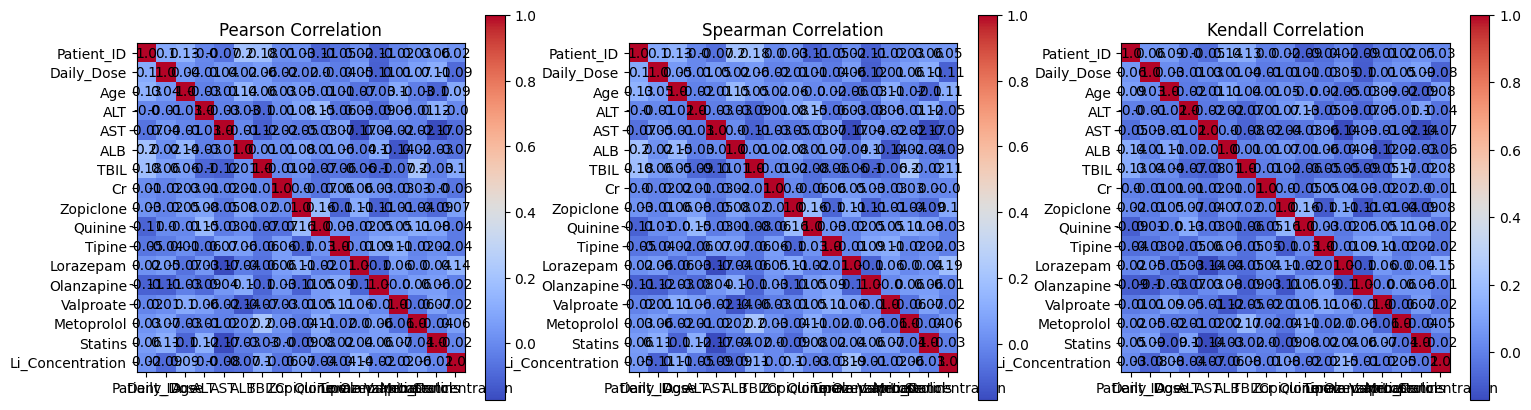

In [3]:
# Use a correlation heatmap on the dataframe

# Calculate different types of correlations
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
kendall_corr = df.corr(method='kendall')

# Plot heatmaps using Matplotlib
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cmap = plt.cm.coolwarm

# Pearson Correlation Heatmap
im1 = axes[0].imshow(pearson_corr, cmap=cmap)
axes[0].set_xticks(np.arange(len(pearson_corr.columns)))
axes[0].set_yticks(np.arange(len(pearson_corr.index)))
axes[0].set_xticklabels(pearson_corr.columns)
axes[0].set_yticklabels(pearson_corr.index)
axes[0].set_title('Pearson Correlation')

# Adding the values on the heatmap
for i in range(len(pearson_corr.columns)):
    for j in range(len(pearson_corr.index)):
        text = axes[0].text(j, i, round(pearson_corr.iloc[i, j], 2),
                           ha="center", va="center", color="black")

# Spearman Correlation Heatmap
im2 = axes[1].imshow(spearman_corr, cmap=cmap)
axes[1].set_xticks(np.arange(len(spearman_corr.columns)))
axes[1].set_yticks(np.arange(len(spearman_corr.index)))
axes[1].set_xticklabels(spearman_corr.columns)
axes[1].set_yticklabels(spearman_corr.index)
axes[1].set_title('Spearman Correlation')

for i in range(len(spearman_corr.columns)):
    for j in range(len(spearman_corr.index)):
        text = axes[1].text(j, i, round(spearman_corr.iloc[i, j], 2),
                           ha="center", va="center", color="black")

# Kendall Correlation Heatmap
im3 = axes[2].imshow(kendall_corr, cmap=cmap)
axes[2].set_xticks(np.arange(len(kendall_corr.columns)))
axes[2].set_yticks(np.arange(len(kendall_corr.index)))
axes[2].set_xticklabels(kendall_corr.columns)
axes[2].set_yticklabels(kendall_corr.index)
axes[2].set_title('Kendall Correlation')

for i in range(len(kendall_corr.columns)):
    for j in range(len(kendall_corr.index)):
        text = axes[2].text(j, i, round(kendall_corr.iloc[i, j], 2),
                           ha="center", va="center", color="black")

# Add colorbar
fig.colorbar(im1, ax=axes[0])
fig.colorbar(im2, ax=axes[1])
fig.colorbar(im3, ax=axes[2])

plt.show()

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Which columns will be the feature and which ONE will be the target

features = df[['Daily_Dose', 'Age', 'ALT', 'AST', 'ALB', 'TBIL', 'Cr']]
target = df[['Li_Concentration']]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 12)

In [11]:
# Train and fit the model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Make prediction
y_pred = model_linear.predict(X_test)

# Import used to evaluate model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 0.10888416566631416
